In [20]:
import csv
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 250)

# load data
df = pd.read_csv('wikidata_provenance.csv')

# of unique chemical compounds in WikiData: 155331
# of unique claim items in WikiData : 233
# of unique provenance items in WikiData: 76

P248     1559092
P813     1509594
P407     1484093
P1476    1477483
P662      931985
P652      148124
P683      137959
P661      132192
P592       58170
P638       54573
P143       39993
P854       26268
P486       13214
P715       11477
P577       11430
P595       10054
P2115       6001
P4168       2399
P3345       1400
P3637        713
P304         484
P4656        381
P393         204
P585         180
P2566        178
P123         142
P2410         98
P5219         98
P958          82
P5076         81
P679          70
P594          37
P356          32
P1640         27
P459          25
P217          24
P351          23
P478          21
P698          21
P3452         20
P433          19
P528          15
P352          14
P593          13
P1683         13
P269          13
P1433          8
P50            7
P2093          7
P348           7
P212       

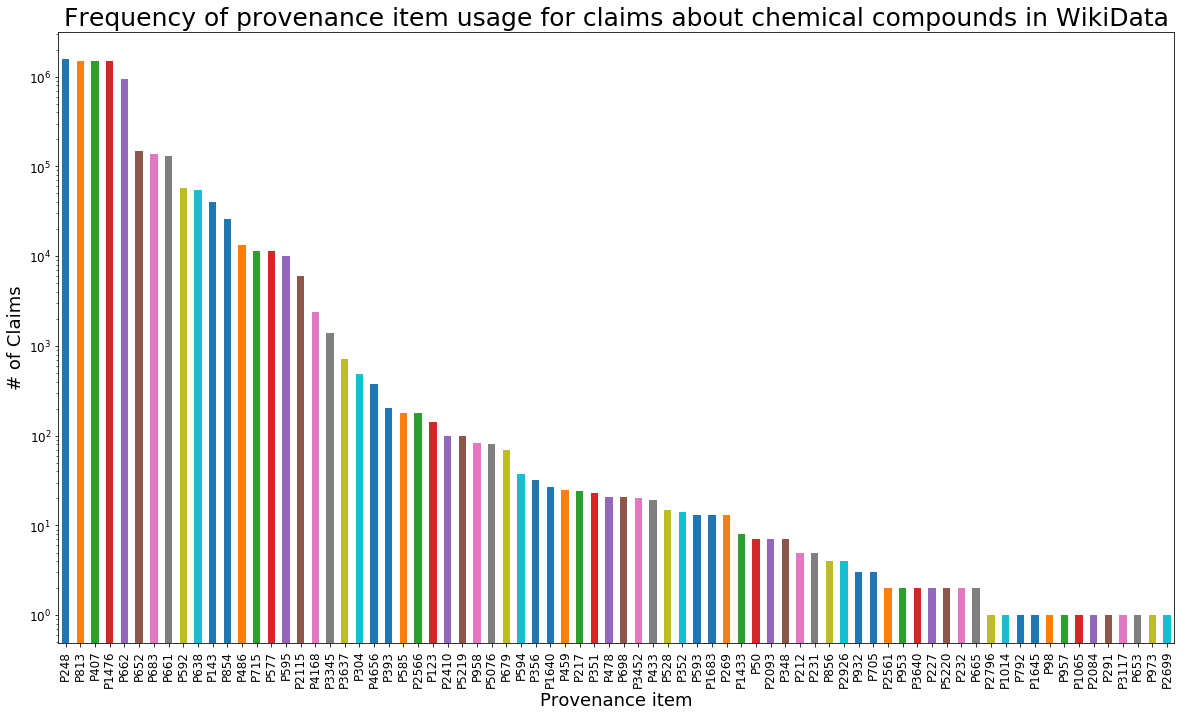

In [21]:
uniqueChemicals = df.chemical.unique()
uniqueClaims = df.claim.unique()
uniqueProvenance = df.provenance.unique()

# Print some data metrics
print("# of unique chemical compounds in WikiData: " + str(len(uniqueChemicals)))
print("# of unique claim items in WikiData : " + str(len(uniqueClaims)))
print("# of unique provenance items in WikiData: " + str(len(uniqueProvenance)))
print()

# Provenance item frequency 
provenanceCounts = df['provenance'].value_counts()

print(provenanceCounts)

# Plot frequencies of each provenance item
provPlot = provenanceCounts.plot(fontsize=12,kind='bar',figsize=(20,11.25),title='Frequency of provenance item usage for claims about chemical compounds in WikiData');
provPlot.set_xlabel('Provenance item', fontsize=18)
provPlot.set_ylabel('# of Claims', fontsize=18)
provPlot.title.set_size(25)
provPlot.set_yscale('log')

In [22]:
# Calculate total number of claims about chemical compounds in WikiData
from __future__ import division

totalNumClaims = 0
g1 = df.groupby('chemical')
claimCounts = g1['claim'].nunique()
totalNumClaims = pd.Series(claimCounts).sum()
print("total # of claims about chemical compounds in WikiData: " + str(totalNumClaims))

total # of claims about chemical compounds in WikiData: 1562170


In [23]:
uniqueProvenanceItems = df.provenance.unique()
provCounts = df['provenance'].value_counts()

In [24]:
prItems = []
cvgs = []

# Calculate coverages for each unique provenance item in WikiData
for provItem in uniqueProvenanceItems:
    thisItemCoverage= provCounts[provItem] / totalNumClaims
    cvgs.append(thisItemCoverage)
    prItems.append(provItem)

# Construct dataframe with data describing provenance item and associated coverages 
coverageData = pd.DataFrame({'provenance': prItems,'coverage': cvgs})    
coverageData.set_index('provenance', inplace=True)

print(coverageData)

                coverage
provenance              
P248        9.980297e-01
P577        7.316745e-03
P143        2.560093e-02
P662        5.965964e-01
P407        9.500202e-01
P1476       9.457889e-01
P813        9.663443e-01
P661        8.462075e-02
P854        1.681507e-02
P652        9.481939e-02
P592        3.723666e-02
P683        8.831241e-02
P595        6.435919e-03
P3345       8.961893e-04
P2115       3.841451e-03
P486        8.458746e-03
P393        1.305876e-04
P4168       1.535684e-03
P3452       1.280270e-05
P585        1.152243e-04
P123        9.089920e-05
P4656       2.438915e-04
P715        7.346832e-03
P3637       4.564164e-04
P638        3.493410e-02
P5219       6.273325e-05
P958        5.249109e-05
P304        3.098254e-04
P2566       1.139441e-04
P679        4.480946e-05
P5076       5.185095e-05
P2699       6.401352e-07
P665        1.280270e-06
P2410       6.273325e-05
P698        1.344284e-05
P351        1.472311e-05
P594        2.368500e-05
P593        8.321758e-06


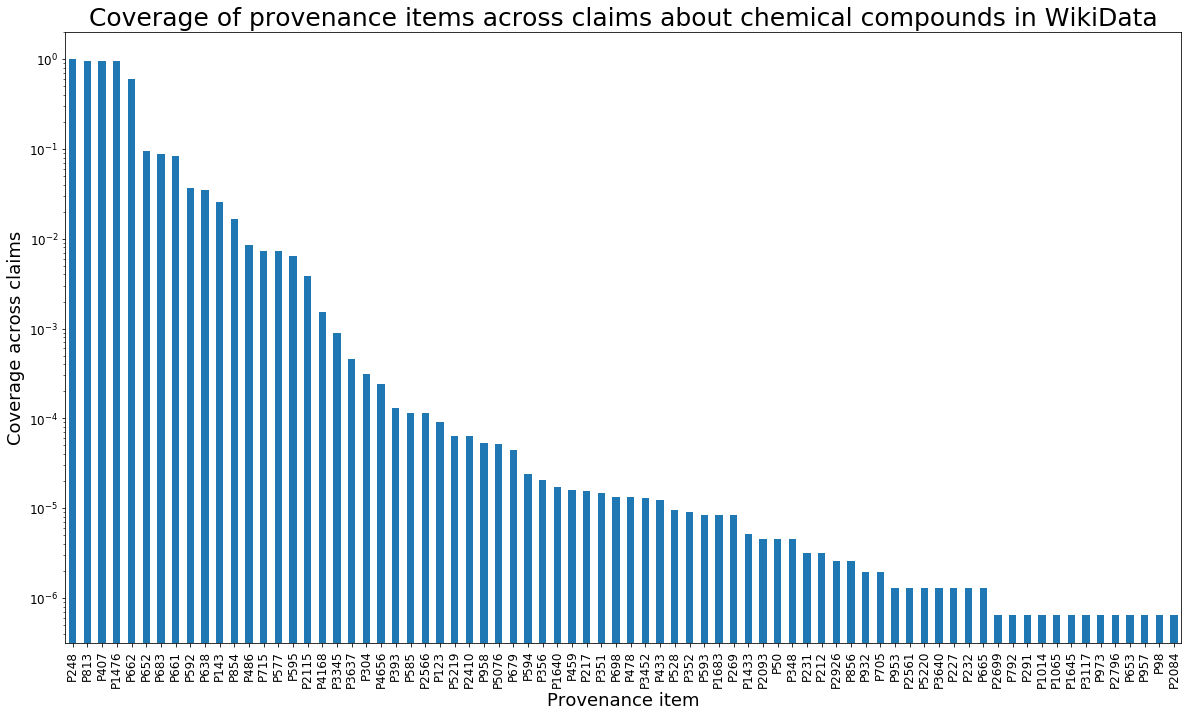

In [25]:
# Plot coverages of each provenance item
provPlot2 = coverageData.sort_values(by=['coverage'],ascending=False).plot(legend=False,fontsize=12,kind='bar',sort_columns=True,figsize=(20,11.25),title='Coverage of provenance items across claims about chemical compounds in WikiData');
provPlot2.set_xlabel('Provenance item', fontsize=18)
provPlot2.set_ylabel('Coverage across claims', fontsize=18)
provPlot2.title.set_size(25)
provPlot2.set_yscale('log')